# 1. Data Exploration and Understanding:

### A. Initial Inspection:

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
train_data = pd.read_csv("Dataset\\Small_sized\\new_train_sample.csv")
train_data.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


### B. Exploratory Data Analysis (EDA):

#### B.1: Basic Dataset Characteristics

- Determine the type of data, the number of observations, and the number of variables:

In [83]:
# Check data shape and column names
print("Number of observations:", train_data.shape[0])
print("Number of variables:", train_data.shape[1])
print("Column names:", train_data.columns.tolist())

Number of observations: 4758418
Number of variables: 46
Column names: ['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City']


#### B.2: Overall Structure of the Dataset:

- View variable types and identify categorical vs. continuous variables.

In [84]:
# Data types and non-null count
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

#### B.3: Data Overview and Initial Exploration
- Summary statistics for numerical and categorical variables:

In [85]:
# Numeric summary
print(train_data.describe())

# Categorical summary
categorical_columns = train_data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n", train_data[col].value_counts(), "\n")


         Unnamed: 0            Id         OrgId    IncidentId       AlertId  \
count  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06   
mean   4.757914e+06  8.425237e+11  1.815396e+02  7.066577e+04  4.062607e+05   
std    2.747579e+06  4.962194e+11  3.868571e+02  1.208436e+05  4.590474e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.378584e+06  4.123169e+11  1.000000e+01  5.030000e+02  2.323700e+04   
50%    4.757002e+06  8.418136e+11  4.500000e+01  1.032300e+04  2.165090e+05   
75%    7.137112e+06  1.271310e+12  1.710000e+02  8.436900e+04  6.709575e+05   
max    9.516834e+06  1.709397e+12  6.147000e+03  5.997030e+05  1.721456e+06   

         DetectorId    AlertTitle      DeviceId        Sha256     IpAddress  \
count  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06   
mean   1.105717e+02  2.945133e+03  9.566974e+04  1.287152e+05  2.857508e+05   
std    4.345897e+02  1.145625e+04  1.633971e+04  3.

#### B.4: Patterns and Relationships in Data
- Correlation analysis to uncover relationships between numerical variables:

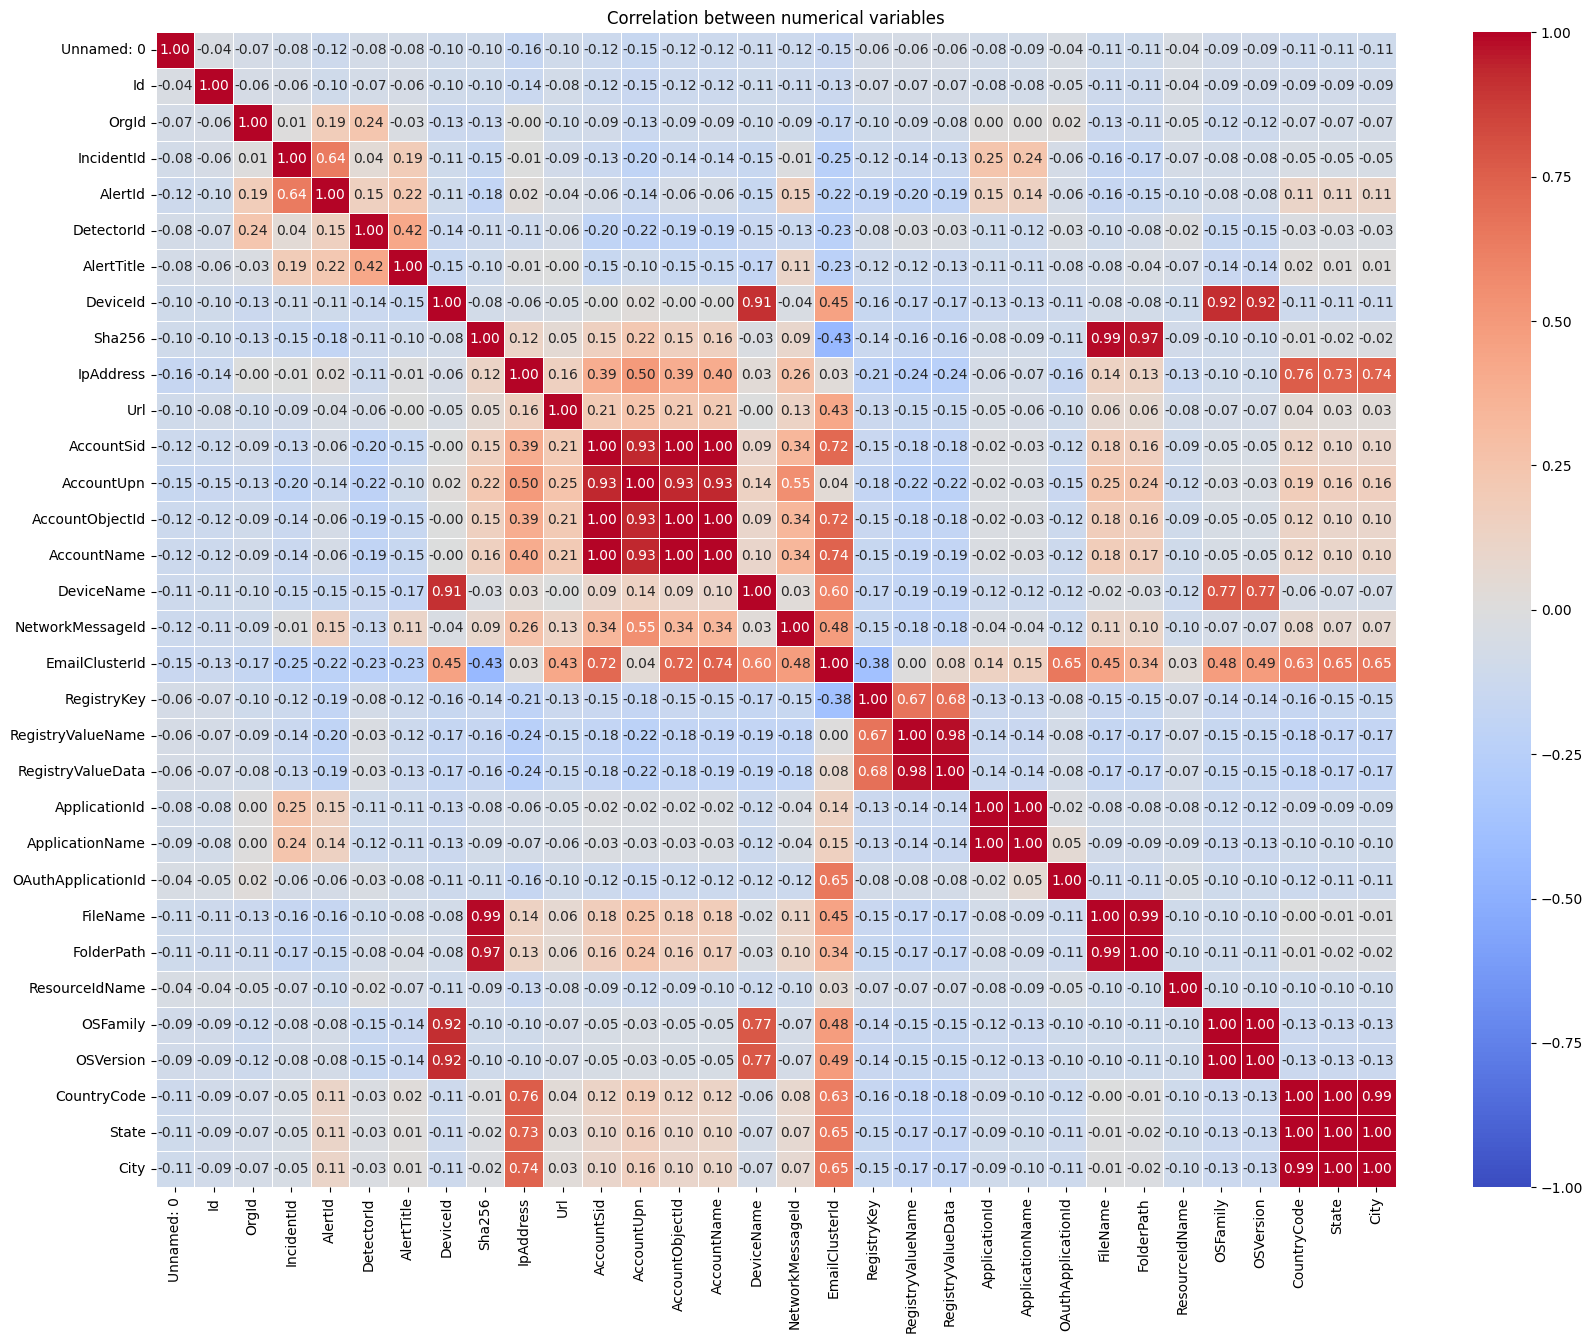

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], errors='coerce')

# Select only numeric columns for correlation
numeric_cols = train_data.select_dtypes(include=['number'])
corr_matrix= numeric_cols.corr().abs()

# Correlation heatmap for numerical columns
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title("Correlation between numerical variables")
plt.show()

- Cross-tabulation for categorical relationships:

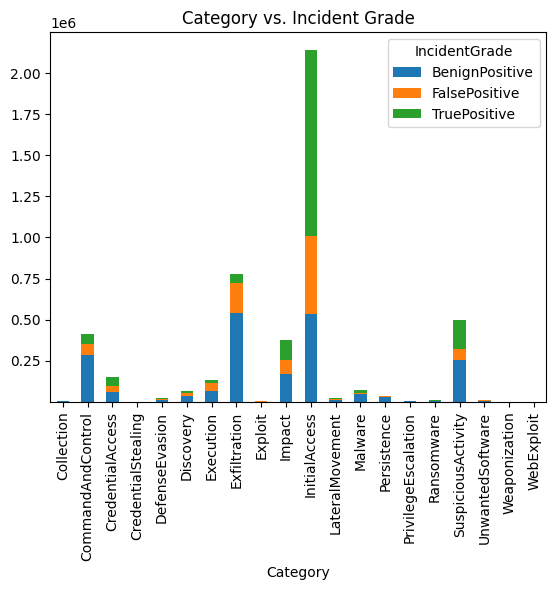

In [87]:
# Example: Relationship between Category and IncidentGrade
pd.crosstab(train_data['Category'], train_data['IncidentGrade']).plot(kind='bar', stacked=True)
plt.title("Category vs. Incident Grade")
plt.show()

#### B.6: Missing Values Analysis
- Identify and handle missing values:

In [88]:
# Missing values by column
print(train_data.isnull().sum())

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

- Impute or drop missing values as necessary:

In [89]:
# Example: Fill missing values in 'EmailClusterId' with the mean
train_data['EmailClusterId'] = train_data['EmailClusterId'].fillna(train_data['EmailClusterId'].mean())


#### B.7: Data Quality and Correctness
- Check for duplicates and remove them:

In [90]:
# Remove duplicates
data = train_data.drop_duplicates()

#### B.8: Distribution and Variability
- Distribution of each variable:

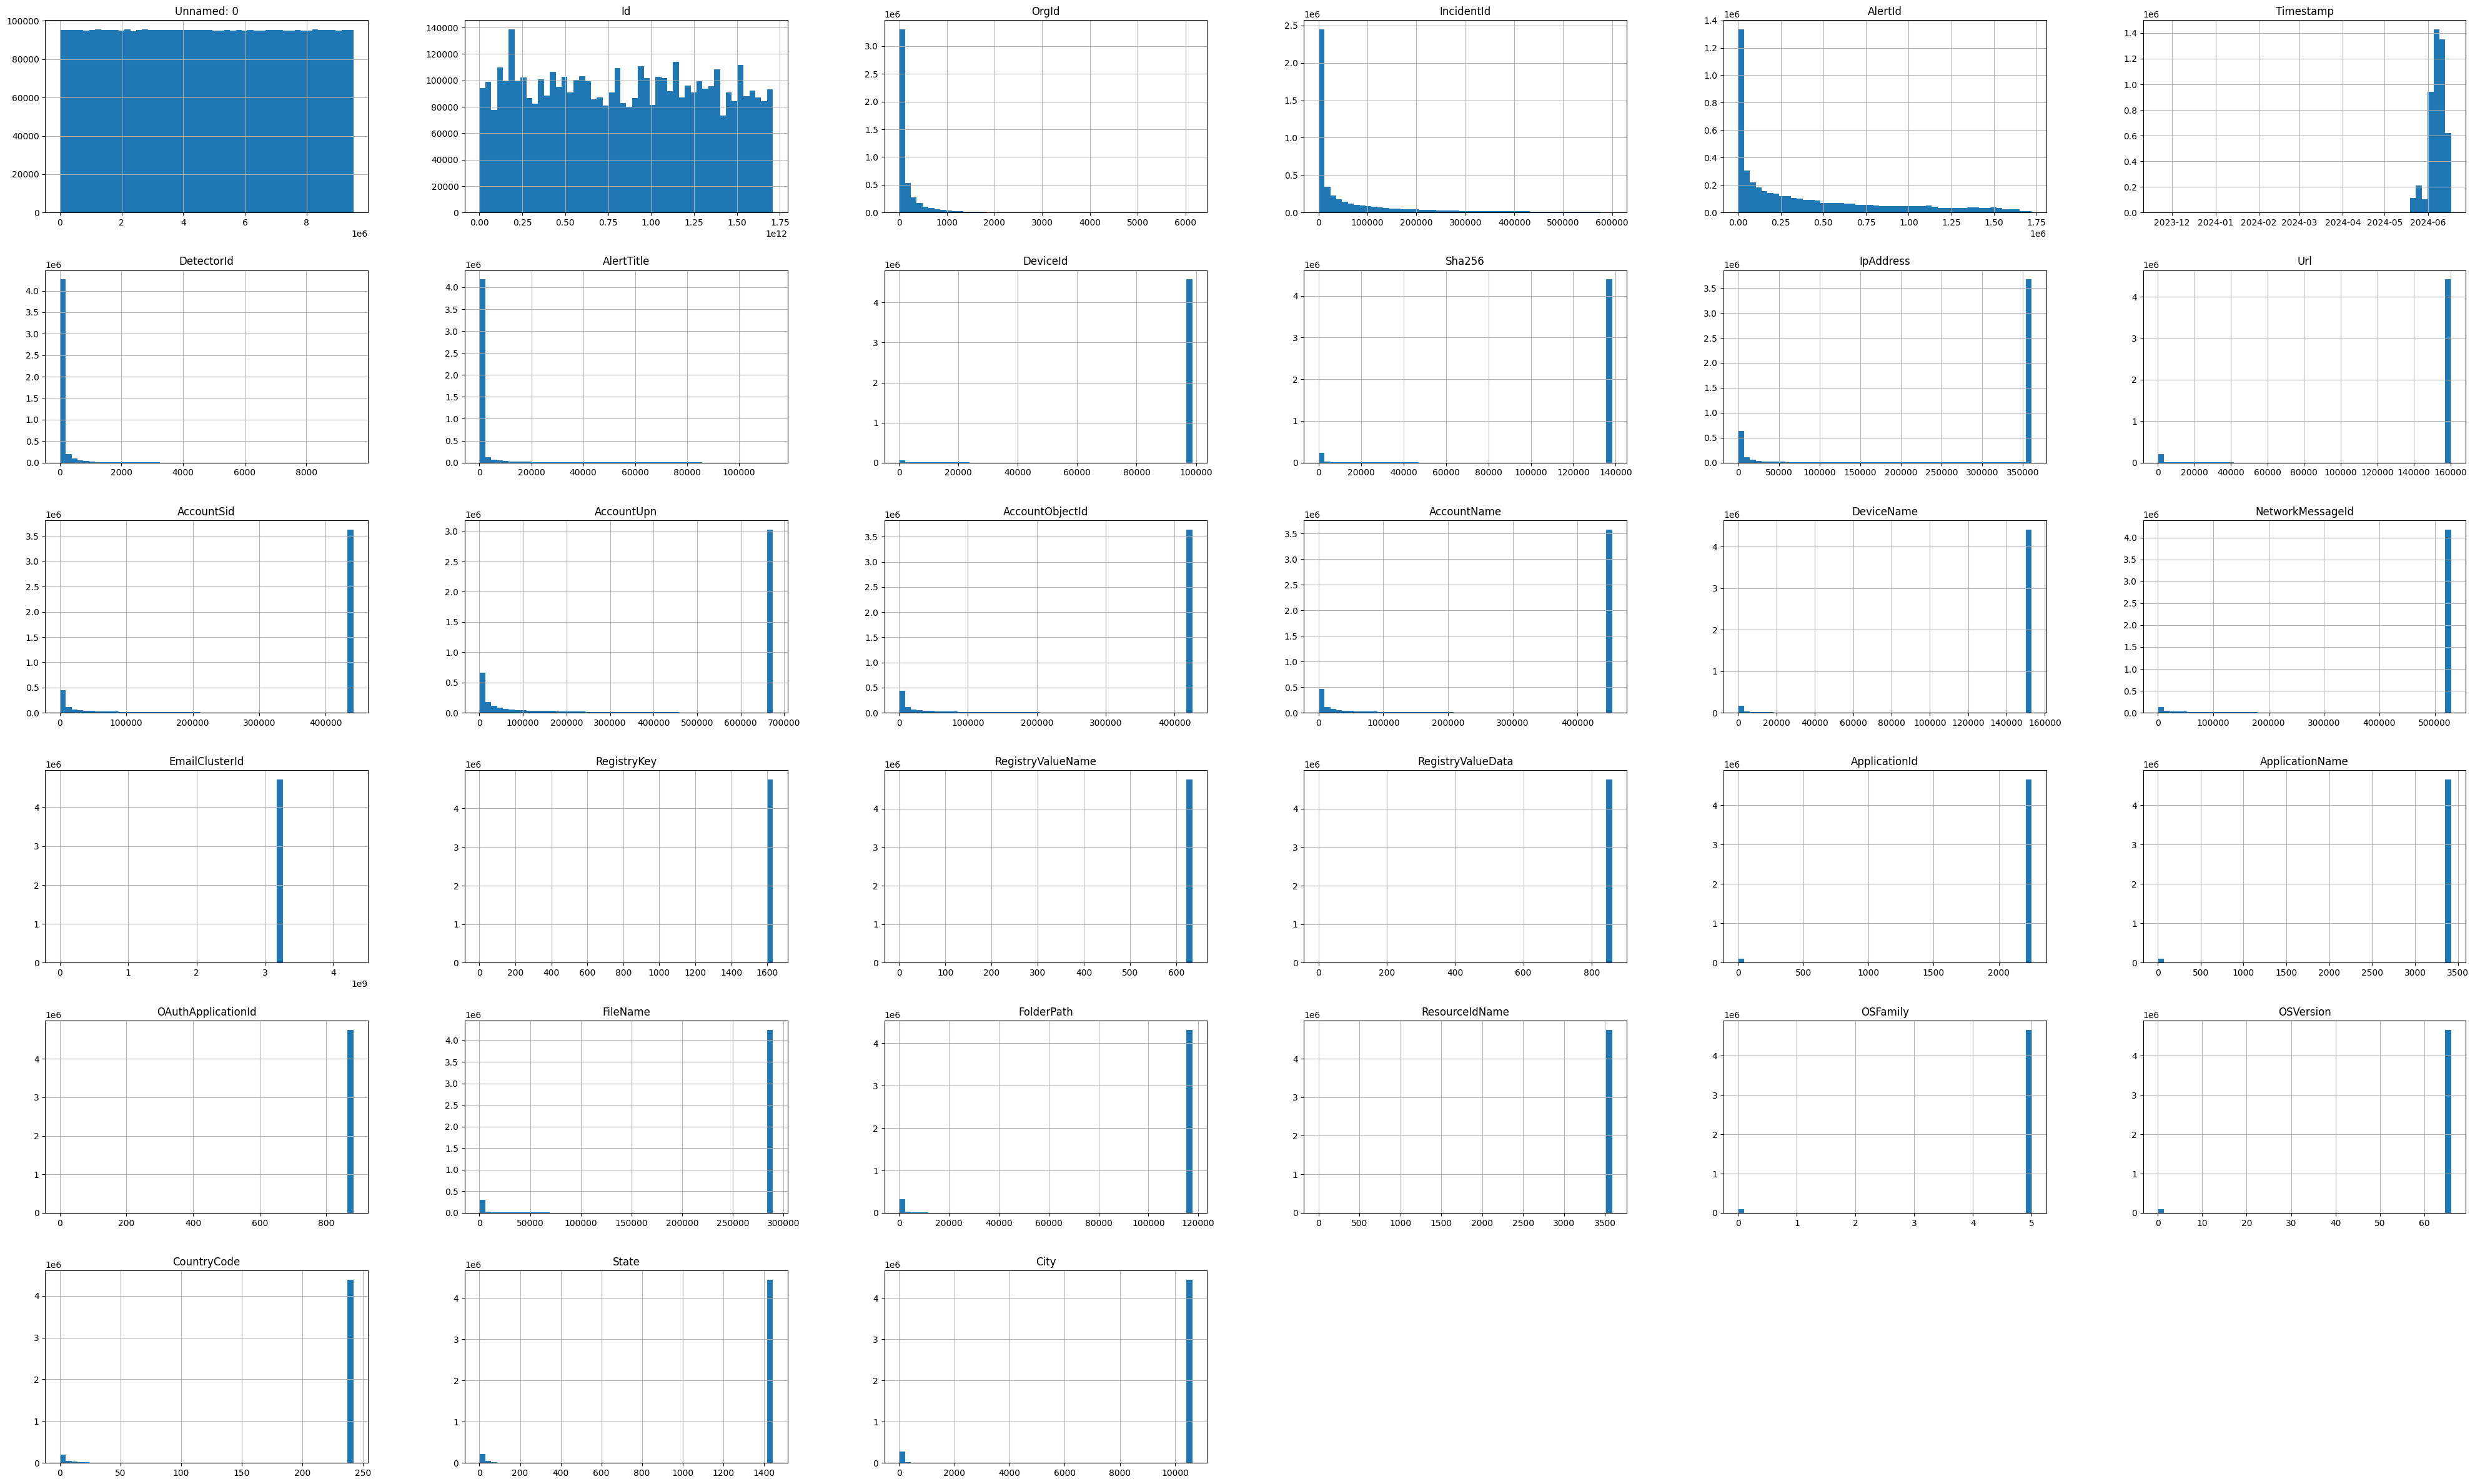

In [91]:
# Histograms for each numerical column
data.hist(figsize=(50, 30), bins=50)
plt.show()

#### B.9: Seasonality and Time-Series Analysis
- Detect seasonality or recurring patterns if applicable, especially with the Timestamp data:

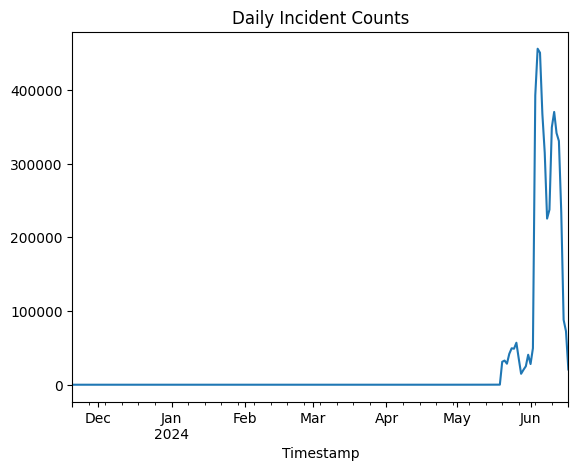

In [92]:
# Plot incident counts over time to see trends
data.set_index('Timestamp')['IncidentId'].resample('D').count().plot()
plt.title("Daily Incident Counts")
plt.show()

#### B.10: Class Imbalance Analysis
- Assess class distribution for categorical columns like IncidentGrade and Category:

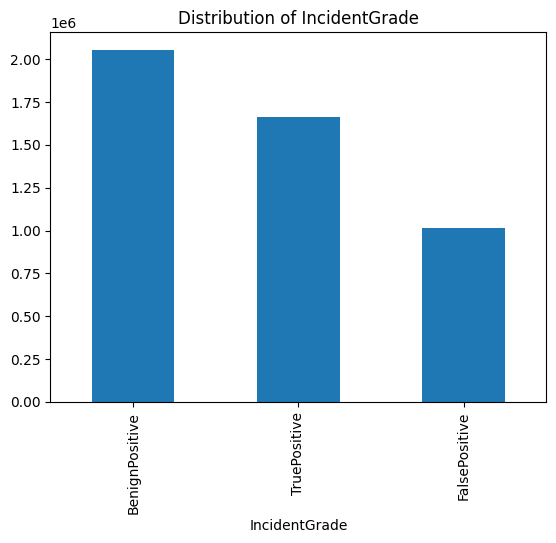

In [93]:

# Class distribution for IncidentGrade
data['IncidentGrade'].value_counts().plot(kind='bar')
plt.title("Distribution of IncidentGrade")
plt.show()

In [94]:
print(data.describe())

         Unnamed: 0            Id         OrgId    IncidentId       AlertId  \
count  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06   
mean   4.757914e+06  8.425237e+11  1.815396e+02  7.066577e+04  4.062607e+05   
std    2.747579e+06  4.962194e+11  3.868571e+02  1.208436e+05  4.590474e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.378584e+06  4.123169e+11  1.000000e+01  5.030000e+02  2.323700e+04   
50%    4.757002e+06  8.418136e+11  4.500000e+01  1.032300e+04  2.165090e+05   
75%    7.137112e+06  1.271310e+12  1.710000e+02  8.436900e+04  6.709575e+05   
max    9.516834e+06  1.709397e+12  6.147000e+03  5.997030e+05  1.721456e+06   

         DetectorId    AlertTitle      DeviceId        Sha256     IpAddress  \
count  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06  4.758418e+06   
mean   1.105717e+02  2.945133e+03  9.566974e+04  1.287152e+05  2.857508e+05   
std    4.345897e+02  1.145625e+04  1.633971e+04  3.

# 2. Data Preprocessing:

#### 2.A: Handling Missing Vlaues 

In [95]:
(data.isnull().sum()/(len(data)))*100

Unnamed: 0             0.000000
Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.437913
IncidentGrade          0.541672
ActionGrouped         99.407093
ActionGranular        99.407093
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId         0.000000
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApp

- Removing Columns

In [96]:
null_columns = len(data)* 0.5   # removing 50% above null value
data = data.dropna(thresh = null_columns, axis = 1)

In [97]:
data.shape

(4758418, 37)

In [98]:
data.duplicated().sum()

0

In [99]:
data = data.drop_duplicates()

In [100]:
data.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         25775
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
EmailClusterId            0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State               

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 37 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Unnamed: 0          int64              
 1   Id                  int64              
 2   OrgId               int64              
 3   IncidentId          int64              
 4   AlertId             int64              
 5   Timestamp           datetime64[ns, UTC]
 6   DetectorId          int64              
 7   AlertTitle          int64              
 8   Category            object             
 9   IncidentGrade       object             
 10  EntityType          object             
 11  EvidenceRole        object             
 12  DeviceId            int64              
 13  Sha256              int64              
 14  IpAddress           int64              
 15  Url                 int64              
 16  AccountSid          int64              
 17  AccountUpn          int64  

#### 2.B: Feature Engineering

- Fill mode values for IncidentGrade

In [102]:
data["IncidentGrade"] = data["IncidentGrade"].fillna(data["IncidentGrade"].mode()[0]) 

In [103]:
data.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [104]:
data['Timestamp'].head()

0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

- Cleaning timestamp column

In [105]:
data["Day"] = data["Timestamp"].dt.day
data["Month"] = data["Timestamp"].dt.month
data["Year"] = data["Timestamp"].dt.year
data["Hour"] = data["Timestamp"].dt.hour
data["Time"] = data["Timestamp"].dt.time

data = data.drop("Timestamp",axis=1) 

In [106]:
data['State'] = data['State'].fillna(data['State'].mode()[0])
data['CountryCode'] = data['CountryCode'].fillna(data['CountryCode'].mode()[0])
data['City'] = data['City'].fillna(data['City'].mode()[0])

In [107]:
data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    2080549
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64

In [108]:
data.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing', 'WebExploit', 'Weaponization'], dtype=object)

In [109]:
data.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
EmailClusterId        0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

In [110]:
data = data.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 int64  
 1   OrgId              int64  
 2   IncidentId         int64  
 3   AlertId            int64  
 4   DetectorId         int64  
 5   AlertTitle         int64  
 6   Category           object 
 7   IncidentGrade      object 
 8   EntityType         object 
 9   EvidenceRole       object 
 10  Sha256             int64  
 11  IpAddress          int64  
 12  Url                int64  
 13  AccountSid         int64  
 14  AccountUpn         int64  
 15  AccountObjectId    int64  
 16  AccountName        int64  
 17  EmailClusterId     float64
 18  RegistryKey        int64  
 19  RegistryValueName  int64  
 20  RegistryValueData  int64  
 21  ApplicationId      int64  
 22  ApplicationName    int64  
 23  FileName           int64  
 24  FolderPath         int64  
 25  OSFamily          

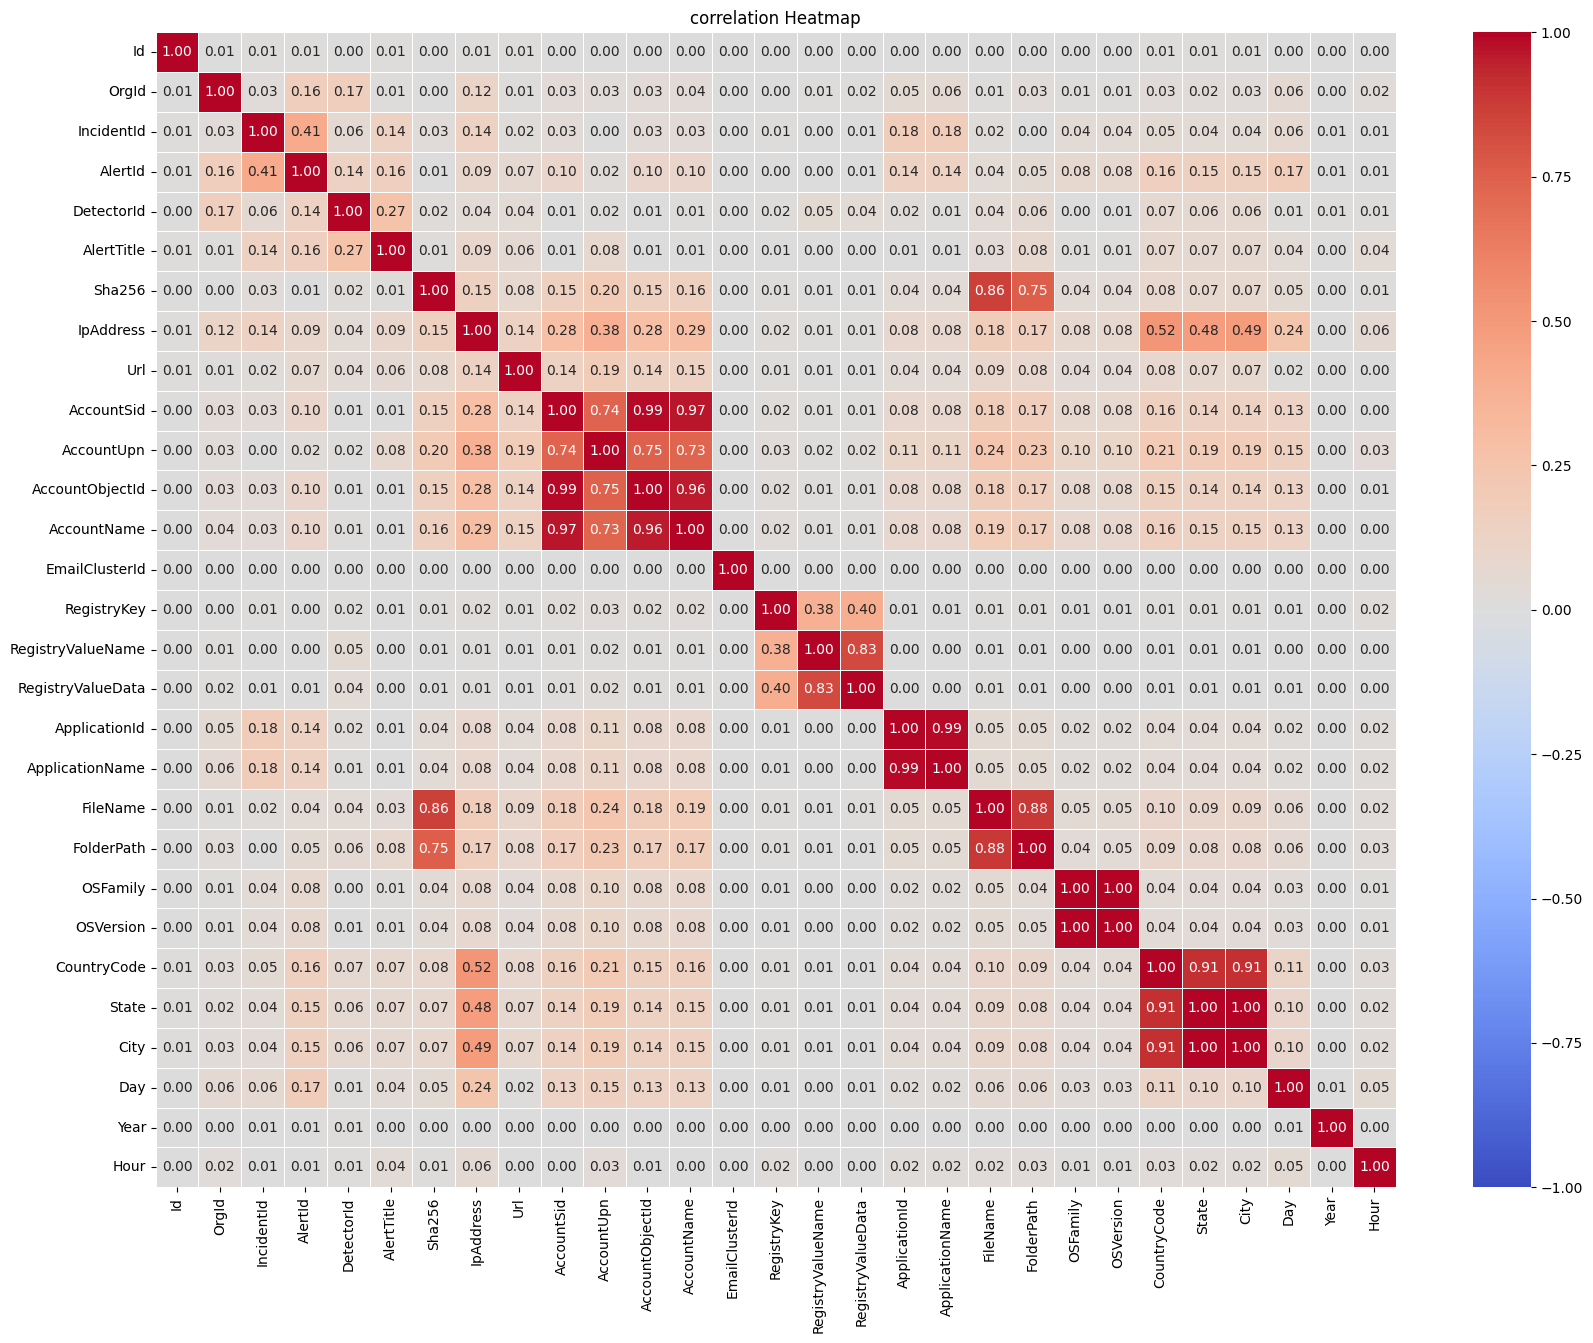

In [112]:
# selecting numerical col
numeric_df = data.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [113]:
data = data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1)

In [114]:
# dropping 70% above correlated columns
data = data.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   OrgId           int64  
 1   IncidentId      int64  
 2   AlertId         int64  
 3   AlertTitle      int64  
 4   Category        object 
 5   IncidentGrade   object 
 6   EntityType      object 
 7   EvidenceRole    object 
 8   IpAddress       int64  
 9   Url             int64  
 10  AccountName     int64  
 11  EmailClusterId  float64
 12  ApplicationId   int64  
 13  FileName        int64  
 14  OSFamily        int64  
 15  OSVersion       int64  
 16  State           int64  
 17  City            int64  
 18  Day             int32  
 19  Year            int32  
 20  Hour            int32  
 21  Time            object 
dtypes: float64(1), int32(3), int64(13), object(5)
memory usage: 744.2+ MB


#### 2.C: Encoding Categorical Variables

- Label Encoding: If there are ordinal categorical variables, use Label Encoding to maintain the order.
- One-Hot Encoding: For non-ordinal categorical variables, apply One-Hot Encoding.
- Target Encoding: For high-cardinality categorical variables, use Target Encoding to reduce the number of new features.

In [116]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=["object"]).columns

encoders = {}
for i in categorical_columns:
    le = LabelEncoder()
    data[i]=le.fit_transform(data[i])
    encoders[i]=le

In [117]:
data

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,...,ApplicationId,FileName,OSFamily,OSVersion,State,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,9,1,360606,160396,...,2251,4132,5,66,1445,10630,6,2024,5,21407
1,33,5065,3990,25,9,0,17,0,360606,160396,...,2251,289573,5,66,1445,10630,3,2024,10,38709
2,201,150787,807590,444,6,0,17,0,360606,160396,...,2251,289573,5,66,1445,10630,13,2024,3,13000
3,204,108287,28575,1233,16,2,9,1,360606,160396,...,2251,97007,5,66,1445,10630,8,2024,16,60897
4,54,528202,1458226,58829,7,0,9,0,360606,160396,...,2251,39978,5,66,1445,10630,9,2024,2,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,7,1,19,0,360606,160396,...,2251,289573,5,66,1445,10630,10,2024,10,37517
4758414,36,1001,257479,2,1,1,30,0,360606,160396,...,2251,289573,5,66,1445,10630,11,2024,19,70252
4758415,851,31194,1518250,1,10,0,19,1,360606,160396,...,2251,289573,5,66,1445,10630,9,2024,4,16061
4758416,12,2419,1203,1334,9,0,13,1,546,160396,...,2251,289573,5,66,1445,10630,21,2024,23,82871


In [118]:
data.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'AccountName', 'EmailClusterId', 'ApplicationId', 'FileName',
       'OSFamily', 'OSVersion', 'State', 'City', 'Day', 'Year', 'Hour',
       'Time'],
      dtype='object')

# 3.Data Splitting:


#### 3.A: Train-Validation Split
- We'll use an 80-20 split, but this can be adjusted based on your dataset's size and needs.

In [119]:
from sklearn.model_selection import train_test_split

# Define the target variable (assuming your target column is 'IncidentGrade')
X = data.drop(columns=['IncidentGrade'])
y = data['IncidentGrade']

# 80-20 Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 3806734
Validation set size: 951684


#### 3.B: Stratified Sampling
- If IncidentGrade or another target variable is imbalanced, stratified sampling ensures that both the training and validation sets have similar distributions of the target class. This can improve model performance, especially on minority classes.

In [120]:
# Stratified train-test split to maintain the class distribution of 'IncidentGrade'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in train and validation sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation set class distribution:\n", y_val.value_counts(normalize=True))

Training set class distribution:
 IncidentGrade
0    0.437235
2    0.349294
1    0.213471
Name: proportion, dtype: float64

Validation set class distribution:
 IncidentGrade
0    0.437235
2    0.349295
1    0.213470
Name: proportion, dtype: float64


In [121]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

# 4. Model Building

#### 4.A: Base Model
- To set a performance benchmark, let's start with a simple baseline model. Logistic regression is a good starting point for classification tasks.

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate and train a baseline model (Logistic Regression)
baseline_model = LogisticRegression(max_iter=25, random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the model
y_pred_baseline = baseline_model.predict(X_val)
print("Baseline Model Accuracy:", accuracy_score(y_val, y_pred_baseline))
print("\nClassification Report for Baseline Model:\n", classification_report(y_val, y_pred_baseline))


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Model Accuracy: 0.45930161692326443

Classification Report for Baseline Model:
               precision    recall  f1-score   support

           0       0.48      0.82      0.60    416110
           1       0.19      0.00      0.00    203156
           2       0.41      0.29      0.34    332418

    accuracy                           0.46    951684
   macro avg       0.36      0.37      0.31    951684
weighted avg       0.39      0.46      0.38    951684



#### 4.B: Advanced Models

- Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=25, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_val, y_pred_rf))


Random Forest Accuracy: 0.9733819208897071

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    416110
           1       0.97      0.95      0.96    203156
           2       0.99      0.97      0.98    332418

    accuracy                           0.97    951684
   macro avg       0.97      0.97      0.97    951684
weighted avg       0.97      0.97      0.97    951684



- XGBoost

In [124]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("\nClassification Report for XGBoost:\n", classification_report(y_val, y_pred_xgb))

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.91571361922655

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92    416110
           1       0.93      0.84      0.89    203156
           2       0.95      0.91      0.93    332418

    accuracy                           0.92    951684
   macro avg       0.92      0.90      0.91    951684
weighted avg       0.92      0.92      0.92    951684



- LightGBM

In [125]:
from lightgbm import LGBMClassifier

# Train a LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Evaluate LightGBM
y_pred_lgbm = lgbm_model.predict(X_val)
print("LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgbm))
print("\nClassification Report for LightGBM:\n", classification_report(y_val, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3226
[LightGBM] [Info] Number of data points in the train set: 3806734, number of used features: 20
[LightGBM] [Info] Start training from score -0.827283
[LightGBM] [Info] Start training from score -1.544256
[LightGBM] [Info] Start training from score -1.051842
LightGBM Accuracy: 0.8919893578120468

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90    416110
           1       0.93      0.78      0.85    203156
           2       0.94      0.87      0.91    332418

    accuracy                           0.89    951684
   macro avg       0.91      0.87      0.89    951684
weighted avg       0.90      0.89      0.89    951684



#### 4.C: Cross-Validation
- To ensure consistent performance across different data subsets, apply k-fold cross-validation. Let’s use 5-fold cross-validation.

In [126]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest as an example
cv_scores_rf = cross_val_score(rf_model, X, y, cv=2, scoring='accuracy')
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

Random Forest CV Accuracy: 0.965387445995707


# 5. Model Evaluation with Performance Metrics
- Calculating precision, recall, and the macro-F1 score, focusing on a breakdown of performance across different classes.

#### 5.A: Performance Metrics

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Evaluating Random Forest as an example
y_pred_val = rf_model.predict(X_val)

# Detailed performance metrics
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("Macro F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

Precision: 0.9739033948182231
Recall: 0.969449809959578
Macro F1 Score: 0.9715815633664766

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    416110
           1       0.97      0.95      0.96    203156
           2       0.99      0.97      0.98    332418

    accuracy                           0.97    951684
   macro avg       0.97      0.97      0.97    951684
weighted avg       0.97      0.97      0.97    951684



#### 5.B: Handling Class Imbalance
- If there is significant class imbalance, use techniques to improve model performance on minority classes.

##### Class Weights Adjustment:

- Random Forest and many other models allow setting class_weight='balanced'.

In [128]:
rf_model = RandomForestClassifier(n_estimators=25, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=25,
                       random_state=42)

#### SMOTE (Synthetic Minority Over-sampling Technique):
- Use SMOTE to generate synthetic samples for minority classes before training.

In [129]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.5, stratify=y_train, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_small, y_train_small)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=25,
                       random_state=42)

# 6. Model Interpretation:
#### 6.A: Feature Importance:


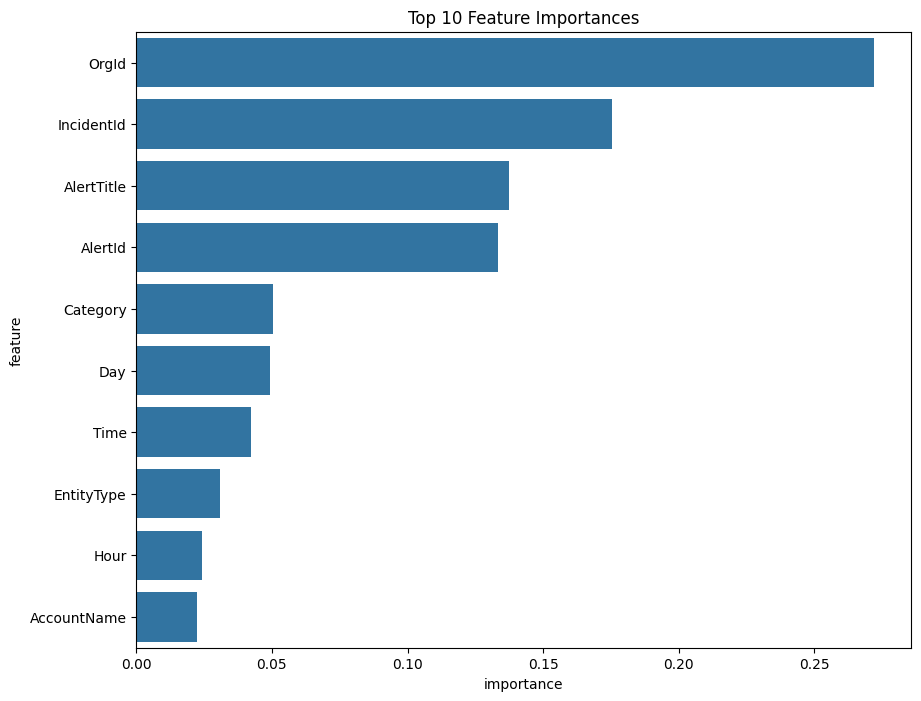

In [130]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()

##### Permutation Importance

- Permutation importance provides insights by randomly shuffling feature values to observe the change in model performance:

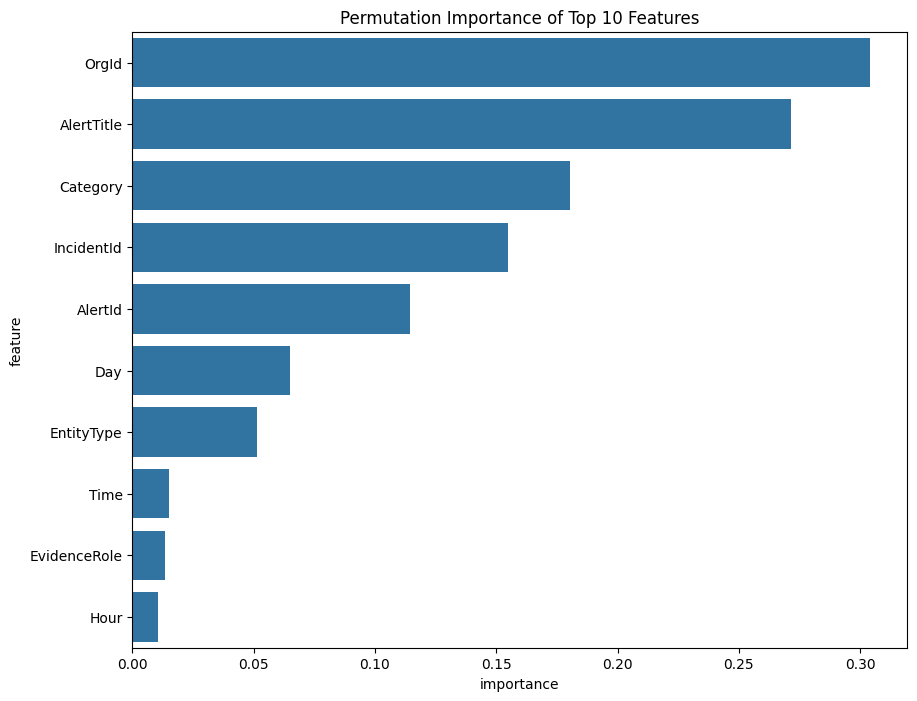

In [131]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)
perm_importance_df = pd.DataFrame({'feature': X_val.columns, 'importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=perm_importance_df.head(10))
plt.title("Permutation Importance of Top 10 Features")
plt.show()

#### 6.B: Error Analysis
- Error analysis reveals areas where the model struggles, guiding possible improvements.

##### Confusion Matrix

- A confusion matrix provides a clear view of class-specific misclassifications.

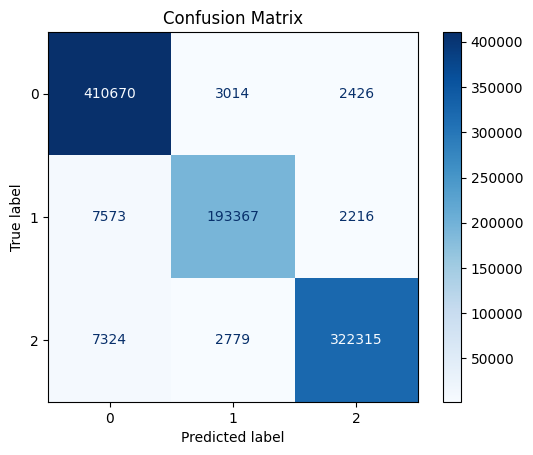

Wrong Prediction Percentage: 2.66%


In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

total_predictions = np.sum(cm)
correct_predictions = np.trace(cm)
incorrect_predictions = total_predictions - correct_predictions
wrong_prediction_percentage = (incorrect_predictions / total_predictions) * 100
print(f"Wrong Prediction Percentage: {wrong_prediction_percentage:.2f}%")